In [9]:
# Imports for project
#Current MO, copy a project and see if it works just for funsies

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as pylab

from skimage.io import imread
from skimage.color import rgb2gray
from skimage import measure, morphology
from skimage.measure import regionprops
#from skimage.filters import threshold_otsu
#from skimage.morphology import square, binary_opening

In [13]:
#Get directory for the dataset, this has to be changed based on the name of the folder holding the image dataset
rootdir = '..\ImageProcessing\Dataset_sig'

#Initialize an array for the images to analyze
docs = []

#Loop through the folder and append files to array
for subdir, _, files in os.walk(rootdir):
    for file in files:
        #There is a .txt file inside of the dataset
        if(file.endswith('.txt')):
            continue
        else:
            docs.append(os.path.join(subdir, file))

#Loop for debugging
#for doc in docs:
#    print(doc)

In [169]:
"""
@ONLINE{hse,
    author = "Ahmet Özlü",
    title  = "Overlapped handwritten signature extraction from scanned documents",
    year   = "2018",
    url    = "https://github.com/ahmetozlu/signature_extractor"
}
"""

#Begin by defining the function where all signature extraction will take place
def signature_extraction(src_im):
    #Check if the input is a numpy array
    im = rgb2gray(src_im)
        
    #Threshold the image to ensure it's in binary
    im_t = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)[1]
    
    #TEST (the following is taken from the link above)
    
    #Connected component analysis (according to link)
    #These two lines are doing the connected component analysis. No idea what the mean is doing.
    #Here is the documentation for the .label() method, this is what really does it
    #https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label
    blobs = im_t > im_t.mean()
    blobs_labels = measure.label(blobs, background=0)
    
    #These are the default "constant parameters" that the author gives us to configure the threshold for what elements are considered
    #as too small or too large to be signatures. They are relative to the average connected component size
    #84
    #250
    #100
    #18
    
    #For small components
    constant_parameter_1 = 84
    constant_parameter_2 = 260
    constant_parameter_3 = 100
    
    #For large components
    constant_parameter_4 = 20  # good val-20
    
    #This is the method that loops through every connected component and finds the largest one
    the_biggest_component = 0
    total_area = 0
    counter = 0
    average = 0.0
    for region in regionprops(blobs_labels):
        if (region.area > 10):
            total_area = total_area + region.area
            counter = counter + 1
        
        if (region.area >= 250):
            if (region.area > the_biggest_component):
                the_biggest_component = region.area
    
    #This computes the average size of components
    average = (total_area/counter)
    print("the_biggest_component: " + str(the_biggest_component))
    print("average: " + str(average))
    
    #This computes the threshold for elements too small
    a4_small_size_outliar_constant = ((average/constant_parameter_1)*constant_parameter_2)+constant_parameter_3
    print("a4_small_size_outliar_constant: " + str(a4_small_size_outliar_constant))
    
    #This compoutes the threshold for elements too large
    a4_big_size_outliar_constant = a4_small_size_outliar_constant*constant_parameter_4
    print("a4_big_size_outliar_constant: " + str(a4_big_size_outliar_constant))
    
    #This removed the small objects using the previous threshold
    pre_version = morphology.remove_small_objects(blobs_labels, a4_small_size_outliar_constant)
    
    #No idea what any of this is doing
    component_sizes = np.bincount(pre_version.ravel())
    too_small = component_sizes > (a4_big_size_outliar_constant)
    too_small_mask = too_small[pre_version]
    pre_version[too_small_mask] = 0
    
    #END TEST
    
    return pre_version

the_biggest_component: 5132
average: 84.54732313575526
a4_small_size_outliar_constant: 361.69409542019486
a4_big_size_outliar_constant: 7233.881908403897


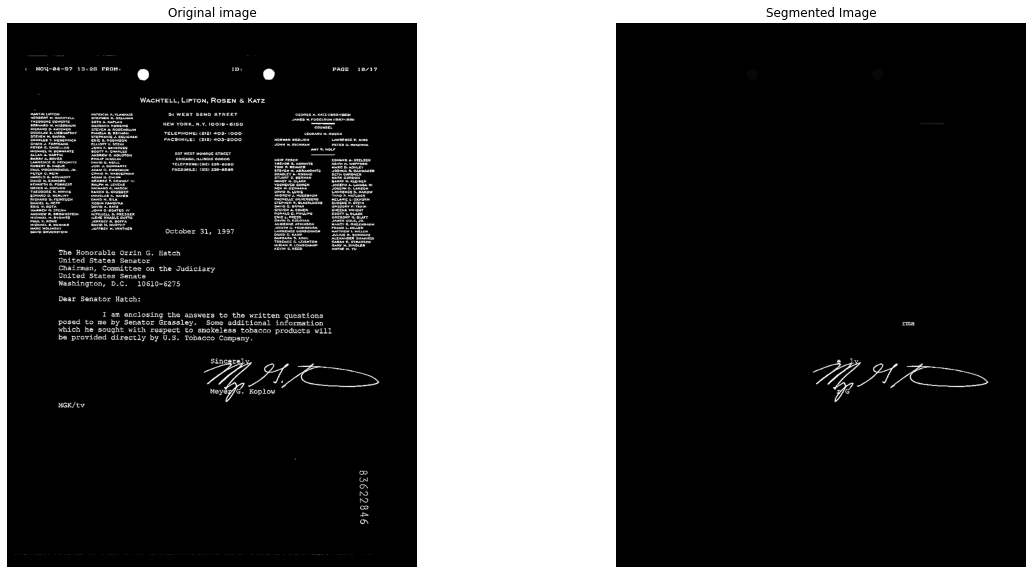

In [170]:
im = imread(docs[0])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 2305
average: 173.94607087827427
a4_small_size_outliar_constant: 638.4045050994204
a4_big_size_outliar_constant: 12768.090101988408


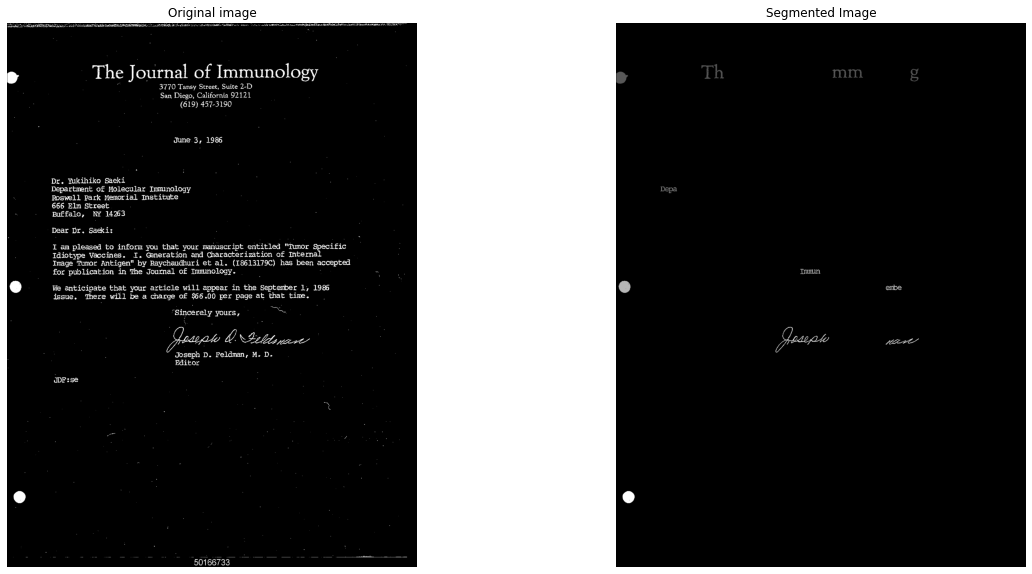

In [171]:
im = imread(docs[1])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 2533
average: 82.6664427275781
a4_small_size_outliar_constant: 355.8723227282179
a4_big_size_outliar_constant: 7117.446454564359


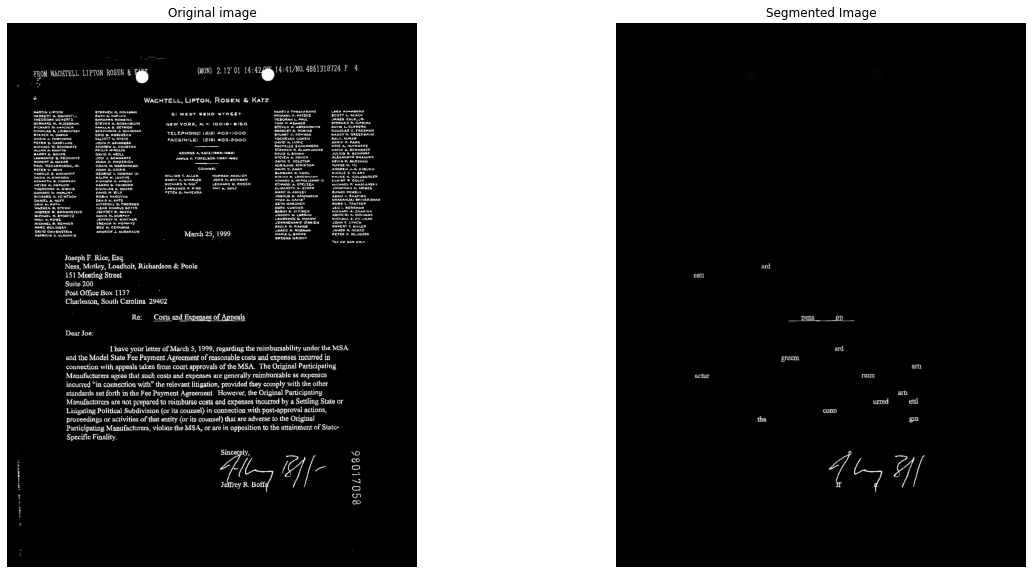

In [172]:
im = imread(docs[2])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 1116
average: 50.390015600624025
a4_small_size_outliar_constant: 255.9690959066934
a4_big_size_outliar_constant: 5119.381918133869


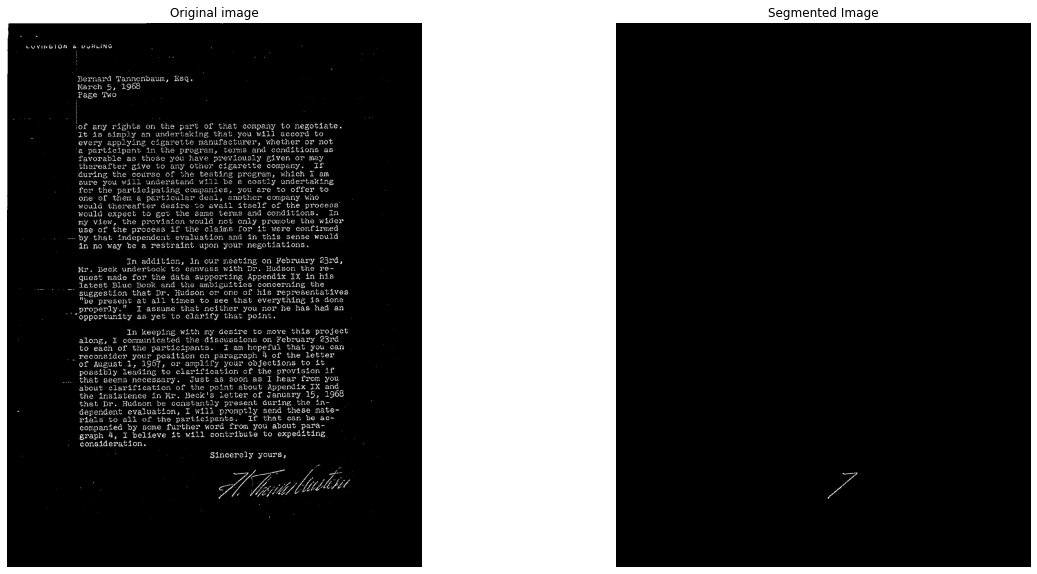

In [173]:
im = imread(docs[5])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 62363
average: 531.3472222222222
a4_small_size_outliar_constant: 1744.6461640211637
a4_big_size_outliar_constant: 34892.923280423274


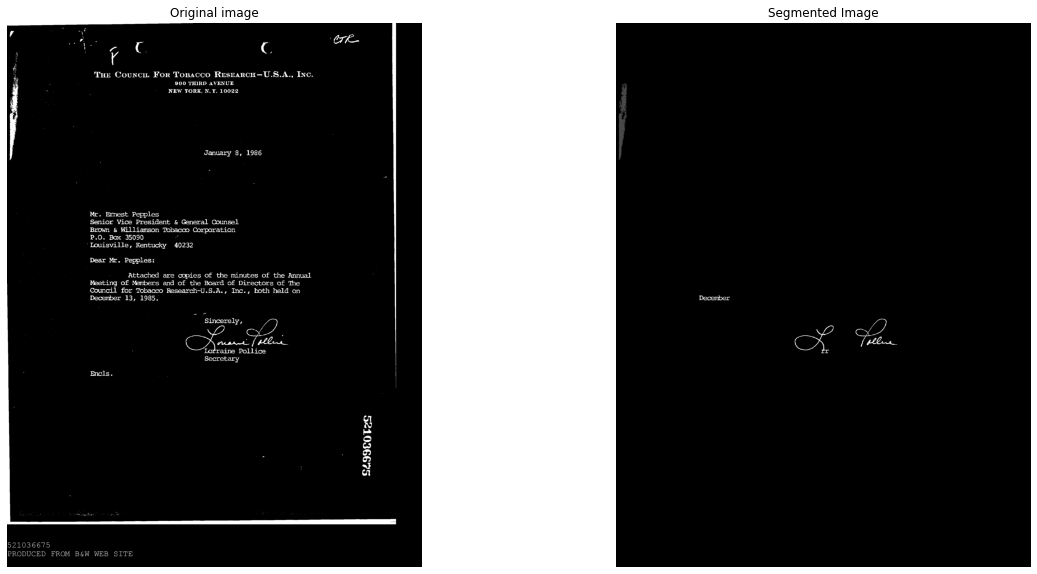

In [174]:
im = imread(docs[6])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 7175
average: 97.86989992301771
a4_small_size_outliar_constant: 402.93064261886434
a4_big_size_outliar_constant: 8058.612852377287


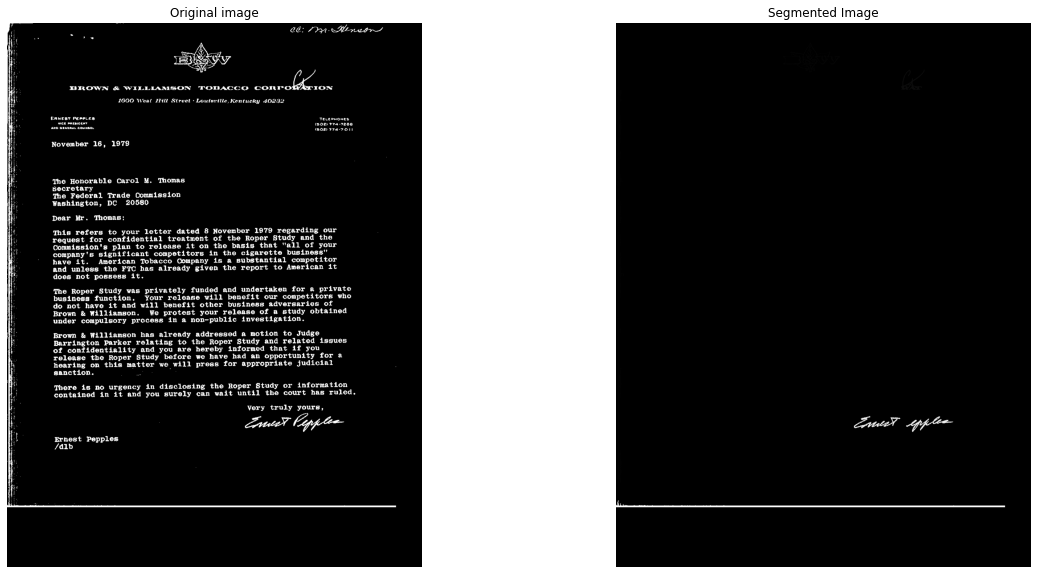

In [175]:
im = imread(docs[7])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 258165
average: 1116.0460992907801
a4_small_size_outliar_constant: 3554.4284025667002
a4_big_size_outliar_constant: 71088.568051334


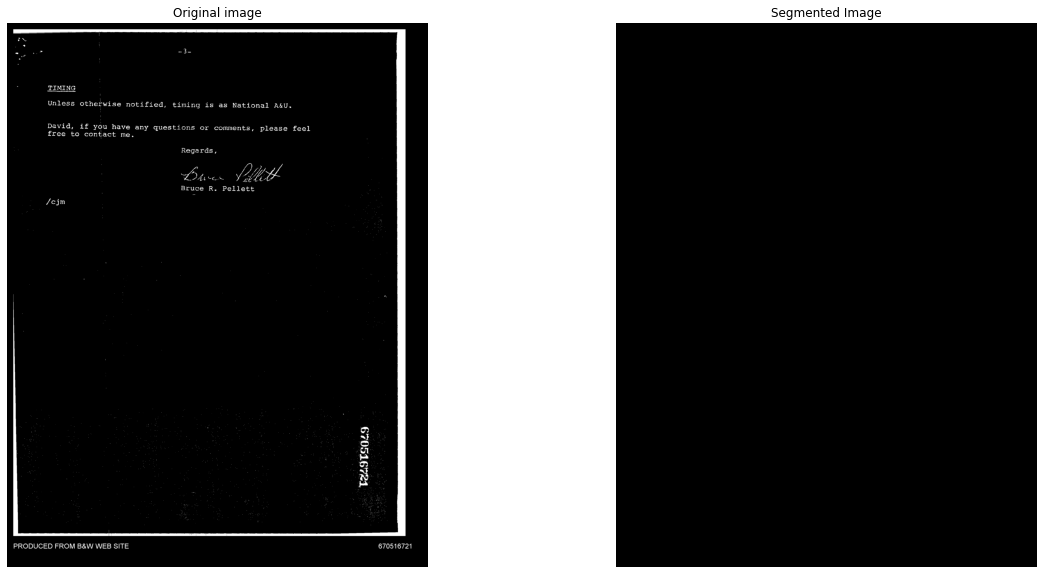

In [176]:
im = imread(docs[9])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 2014
average: 106.16666666666667
a4_small_size_outliar_constant: 428.6111111111111
a4_big_size_outliar_constant: 8572.222222222223


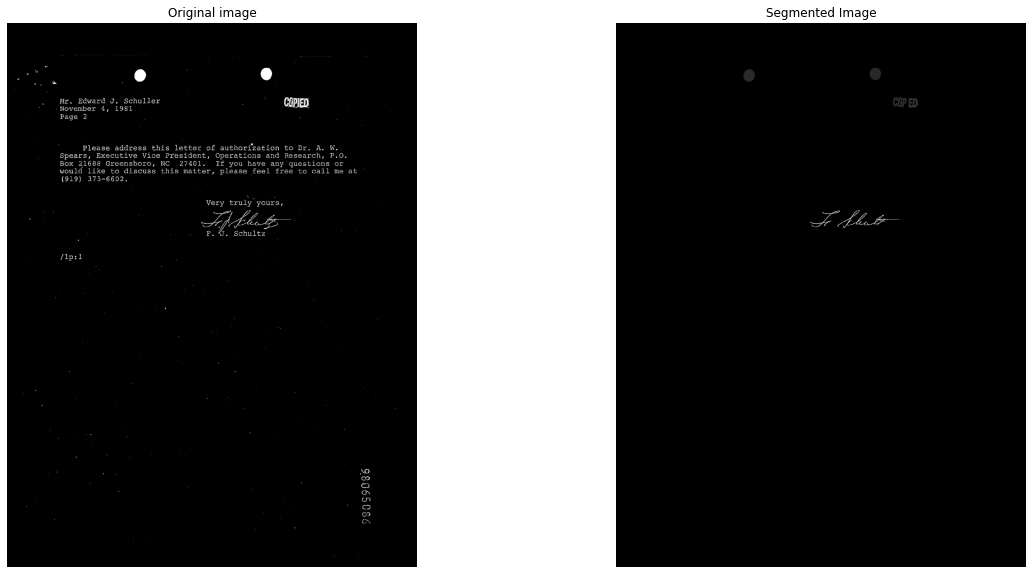

In [177]:
im = imread(docs[10])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 3230
average: 161.04594767070836
a4_small_size_outliar_constant: 598.4755523140973
a4_big_size_outliar_constant: 11969.511046281947


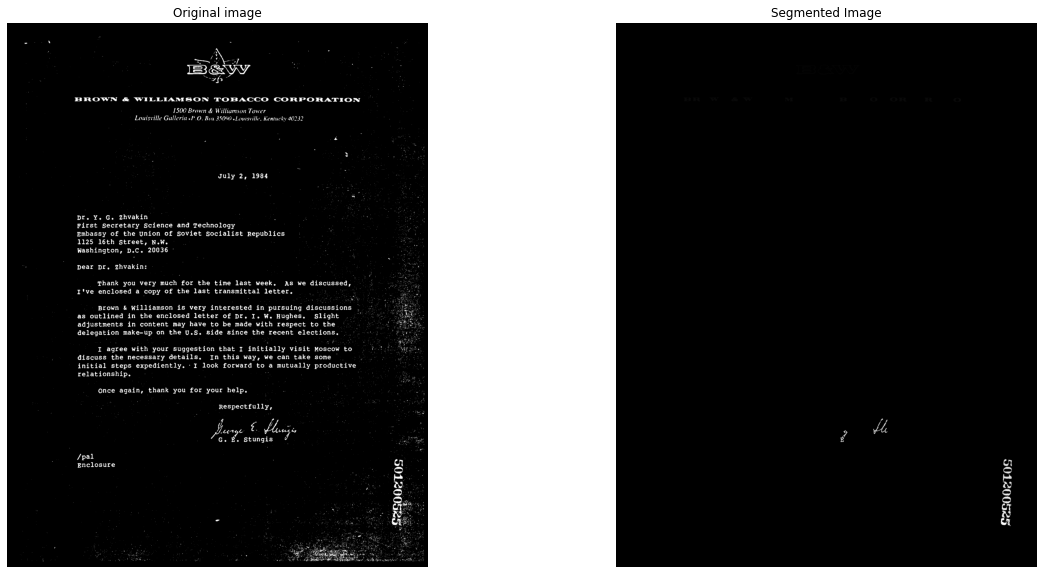

In [178]:
im = imread(docs[11])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 71594
average: 418.3842794759825
a4_small_size_outliar_constant: 1394.998960282803
a4_big_size_outliar_constant: 27899.97920565606


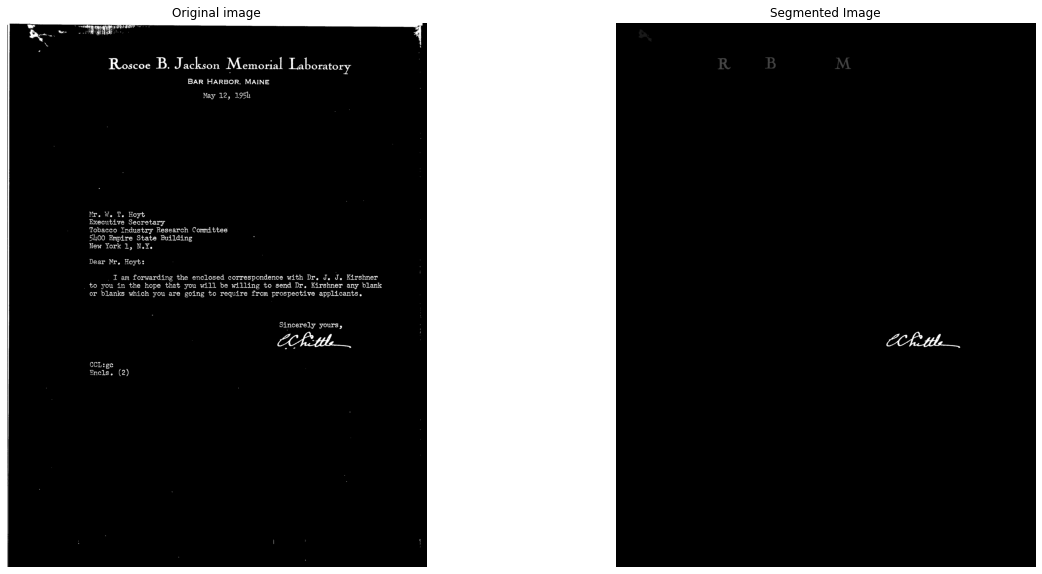

In [179]:
im = imread(docs[12])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 34826
average: 364.7014388489209
a4_small_size_outliar_constant: 1228.8377869133265
a4_big_size_outliar_constant: 24576.75573826653


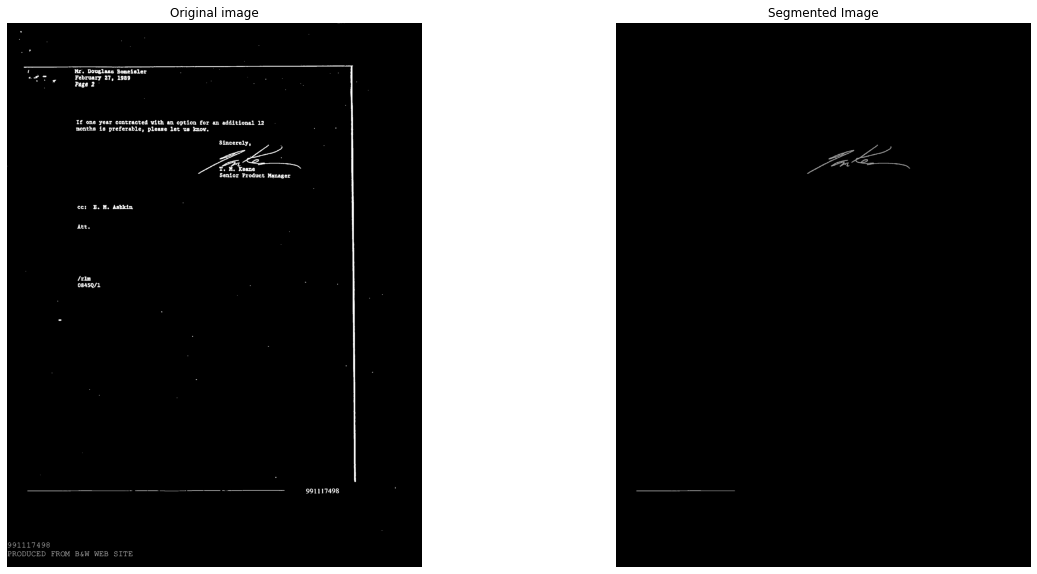

In [180]:
im = imread(docs[13])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 18762
average: 375.2326283987915
a4_small_size_outliar_constant: 1261.4343259962593
a4_big_size_outliar_constant: 25228.686519925184


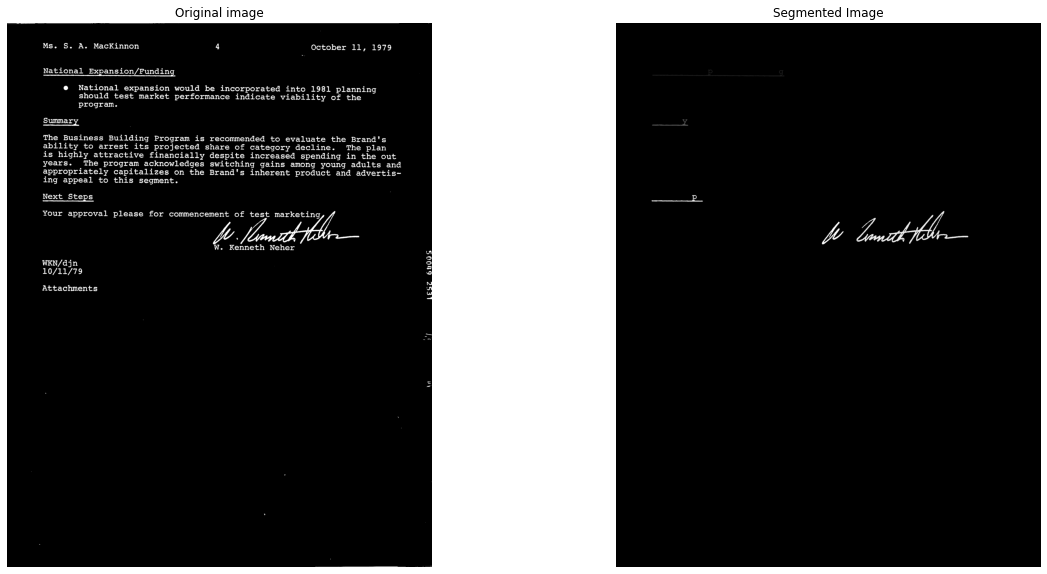

In [181]:
im = imread(docs[14])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 27969
average: 395.8642487046632
a4_small_size_outliar_constant: 1325.2941031334815
a4_big_size_outliar_constant: 26505.88206266963


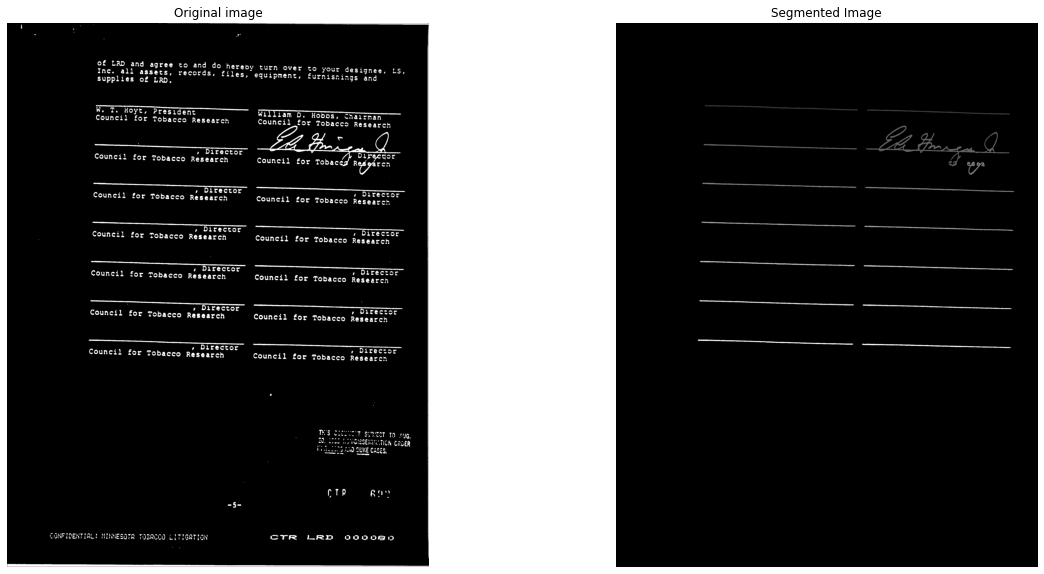

In [182]:
im = imread(docs[15])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 26239
average: 416.48979591836735
a4_small_size_outliar_constant: 1389.1350826044704
a4_big_size_outliar_constant: 27782.70165208941


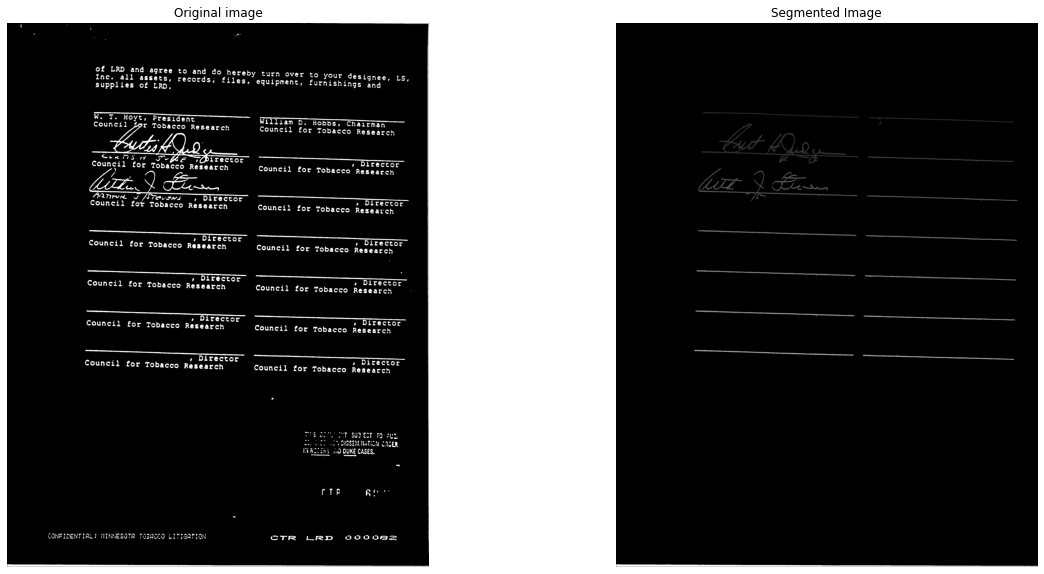

In [183]:
im = imread(docs[16])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 58553
average: 238.6891651865009
a4_small_size_outliar_constant: 838.7997970058361
a4_big_size_outliar_constant: 16775.99594011672


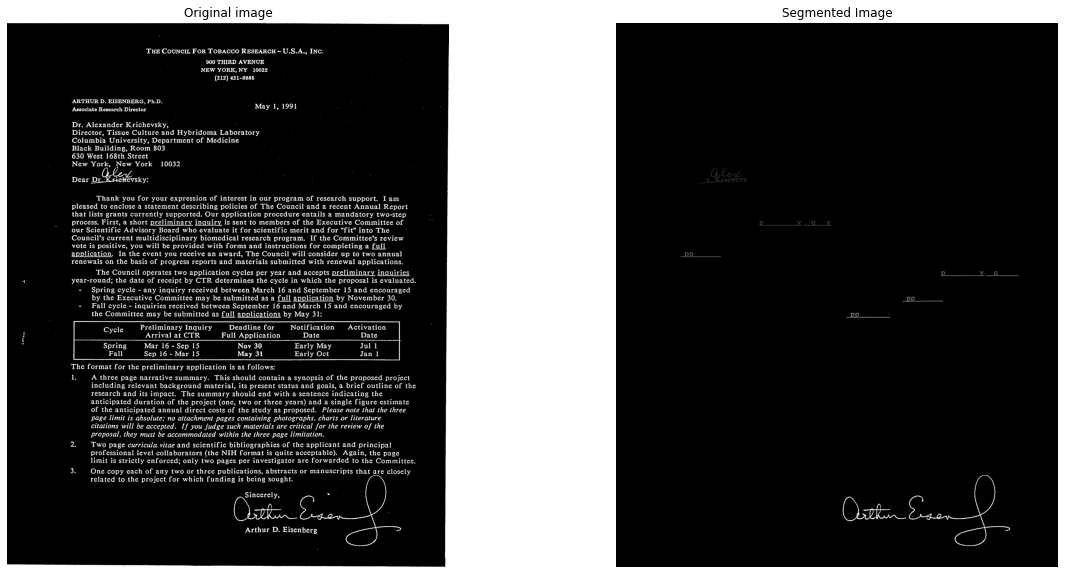

In [184]:
im = imread(docs[17])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 4079
average: 224.59132720105126
a4_small_size_outliar_constant: 795.1636318127777
a4_big_size_outliar_constant: 15903.272636255553


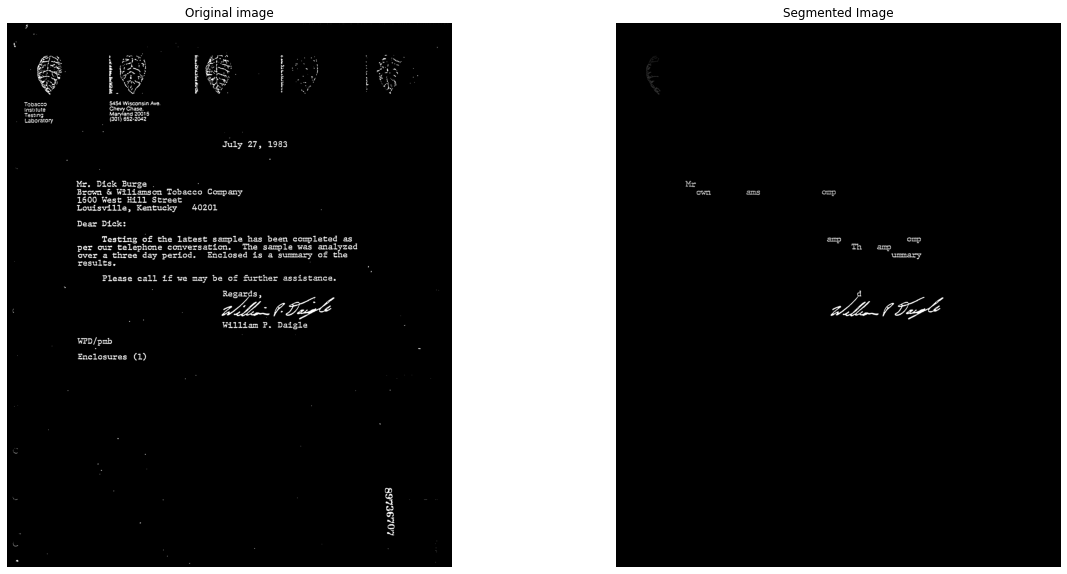

In [185]:
im = imread(docs[18])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 106249
average: 395.9385382059801
a4_small_size_outliar_constant: 1325.5240468280335
a4_big_size_outliar_constant: 26510.48093656067


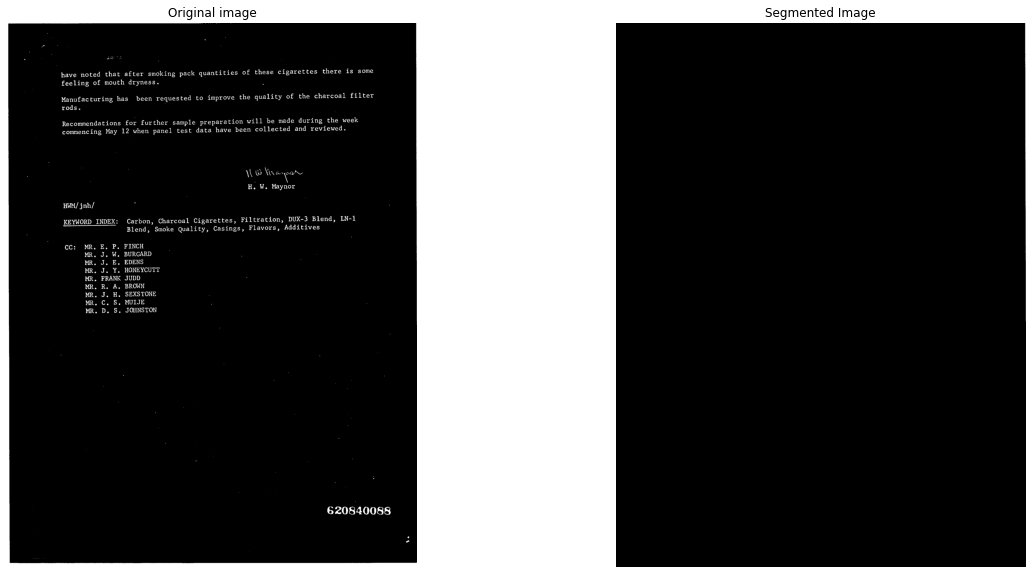

In [186]:
im = imread(docs[19])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 32305
average: 264.48148148148147
a4_small_size_outliar_constant: 918.6331569664902
a4_big_size_outliar_constant: 18372.663139329805


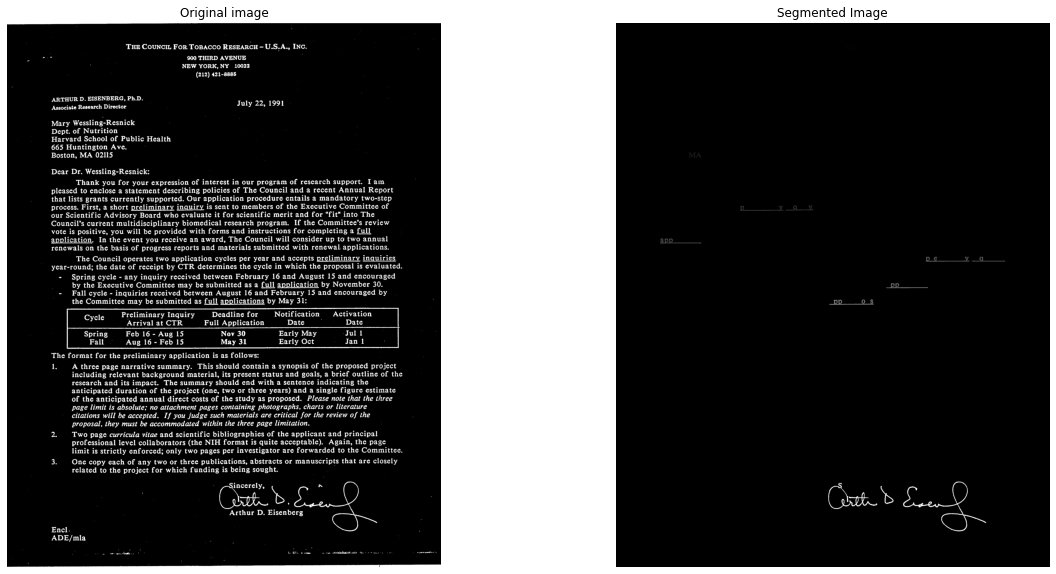

In [187]:
im = imread(docs[20])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 61721
average: 317.57327080890974
a4_small_size_outliar_constant: 1082.9648858371015
a4_big_size_outliar_constant: 21659.297716742032


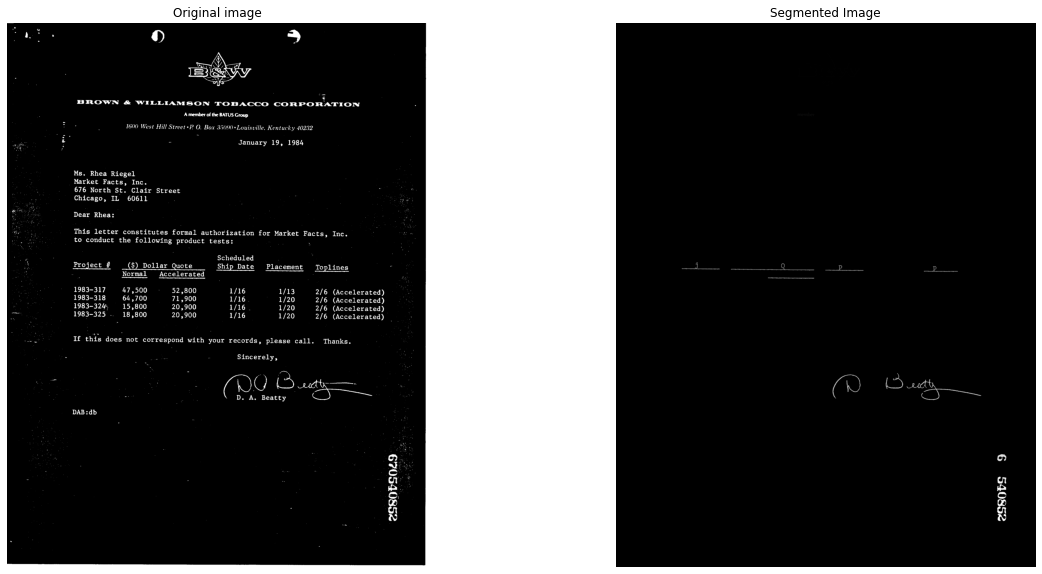

In [188]:
im = imread(docs[21])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 3371
average: 142.4565916398714
a4_small_size_outliar_constant: 540.9370693615067
a4_big_size_outliar_constant: 10818.741387230133


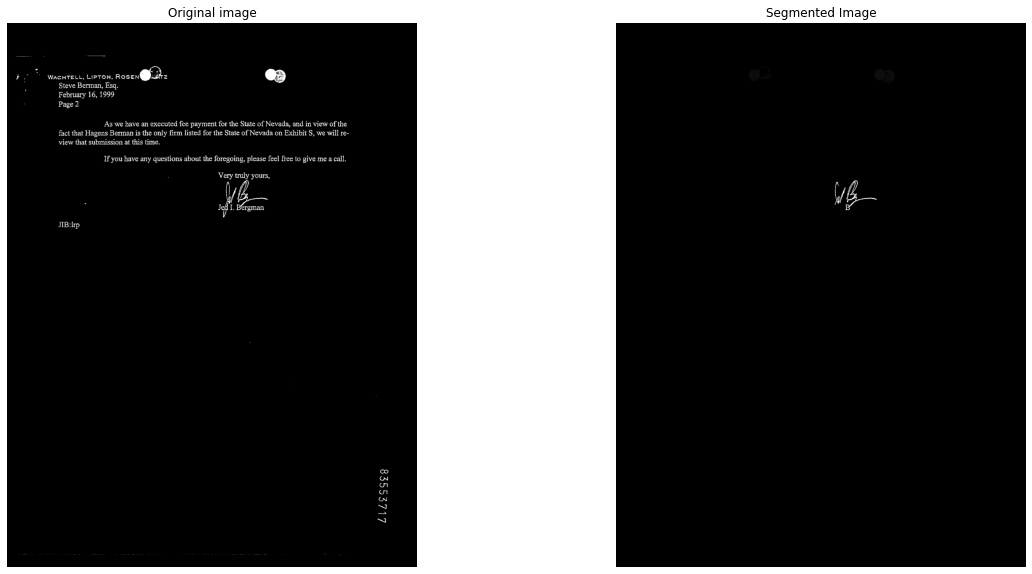

In [189]:
im = imread(docs[22])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()

the_biggest_component: 9400
average: 379.02304737516005
a4_small_size_outliar_constant: 1273.1665752088288
a4_big_size_outliar_constant: 25463.331504176575


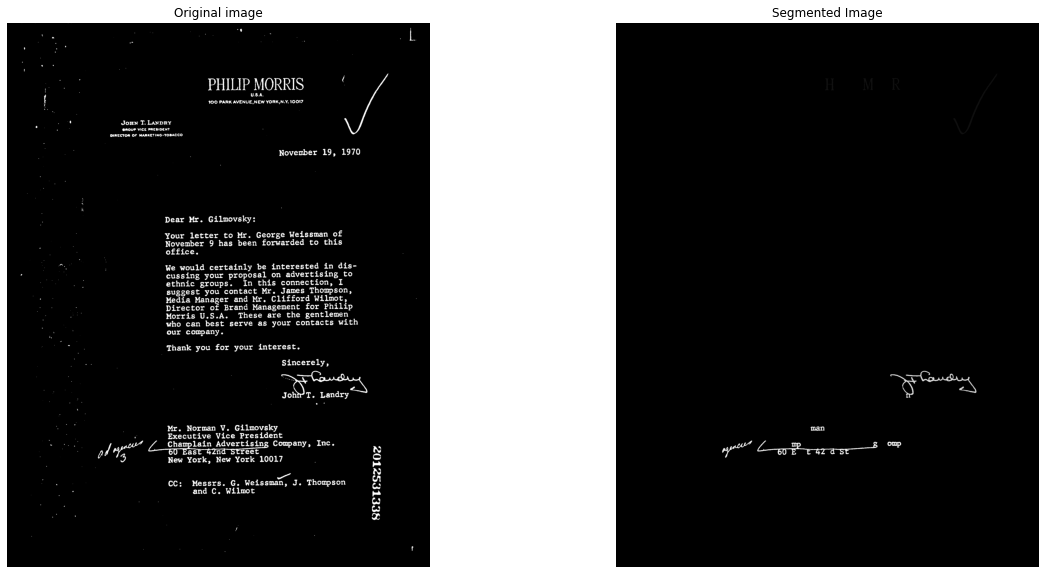

In [190]:
im = imread(docs[23])

im_test = signature_extraction(im)

fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20, 10), sharex=True,sharey=True)
axes1.axis('off'), axes1.imshow(im, cmap=pylab.cm.gray),
axes1.set_title('Original image')
axes2.axis('off'), axes2.imshow(im_test, cmap=pylab.cm.gray),
axes2.set_title('Segmented Image')
pylab.show()